

---


**MÁSTER UNIVERSITARIO EN DATA ANALYTICS FOR BUSINESS** | **UPF Barcelona School of Management** | **Curso 2023-2024**

**Trabajo Final de Máster**

**Título del proyecto**: Análisis exploratorio de accidentes de tráfico en Barcelona

**Script**: Análisis de las causas de los conductores

**Autores**: Joel Bullich Esquerra y Pablo García Prado

**Mentora**: Alexandra Abós Ortega


---




## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy import stats
import seaborn as sns
# import os
# import random
# import folium
# from tabulate import tabulate

from google.colab import drive
drive.mount('/content/drive')

pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Ruta del archivo
path = "/content/drive/MyDrive/TFM/clean_data/DatosCausaConductor.csv"

# Cargar el archivo en un DataFrame
df = pd.read_csv(path)

df.shape

<ipython-input-2-425d82947087>:5: DtypeWarning: Columns (14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


(69355, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69355 entries, 0 to 69354
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Numero_expedient            69355 non-null  object 
 1   Codi_districte              69355 non-null  int64  
 2   Nom_districte               69355 non-null  object 
 3   Codi_barri                  69355 non-null  int64  
 4   Nom_barri                   69355 non-null  object 
 5   Codi_carrer                 69355 non-null  int64  
 6   Nom_carrer                  69354 non-null  object 
 7   Num_postal                  69339 non-null  object 
 8   Descripcio_dia_setmana      69355 non-null  object 
 9   Any                         69355 non-null  int64  
 10  Mes_any                     69355 non-null  int64  
 11  Dia_mes                     69355 non-null  int64  
 12  Hora_dia                    69355 non-null  int64  
 13  Descripcio_torn             693

## Definición de funciones

### Histograma

In [3]:
def histograma(data, variable, titulo='', xlabel='', bins=20):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=variable, kde=True, color='skyblue', edgecolor='black', bins=bins)
    plt.title(titulo if titulo else f'Distribución de la variable {variable}', fontsize=16)
    plt.xlabel(xlabel if xlabel else variable, fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tick_params(axis='both', which='minor', labelsize=10)
    plt.tight_layout()
    plt.show()

# Ejemplo de uso con especificación de bins:
# histograma(df, 'Edad', titulo='Histograma de Edades', xlabel='Edad (años)', bins=10)

### Sexo

In [4]:
def plotSexo(df, nomVariable, title):
    conteo = df[nomVariable].value_counts()
    tipos_esperados = ['Home', 'Dona', 'Desconegut']
    conteo = conteo.reindex(tipos_esperados, fill_value=0)
    paleta = sns.color_palette("rocket", len(conteo.index))
    paleta.sort(reverse=False)
    plt.figure(figsize=(8, 6))
    sns.barplot(x=conteo.index, y=conteo.values, hue = conteo.index, palette=paleta, legend = False)
    plt.xlabel('Sexo')
    plt.ylabel('Cantidad')
    plt.title(title)
    plt.xticks(['Home', 'Dona', 'Desconegut'], ['Hombre', 'Mujer', 'Desconocido'])
    plt.show()

# Ejemplo de uso:
# plotSexo(df, 'Descripcio_sexe', 'Conteo del Sexo de los implicados')

### Boxplots

In [5]:
def plotBoxplot(df, x_variable, title, x_label):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x_variable, data=df, fill = False, showmeans=True, meanline=True, meanprops= {'color' : 'green'}, medianprops={'color': 'red'})
    plt.title(title)
    plt.xlabel(x_label)
    mean_value = np.mean(df[x_variable])
    median_value = np.median(df[x_variable])

    # Imprime los valores
    print(f"Valor de la media: {mean_value:.2f}")
    print(f"Valor de la mediana: {median_value:.2f}")
    plt.show()

# Ejemplo de uso:
# plotBoxplot(df, 'Edat', 'Edad de los implicados', 'Edad')


In [6]:
def plotMultipleBoxplots(dataframes, x_variable, titles, x_label):
    num_plots = len(dataframes)
    plt.figure(figsize=(10, 6))

    for i in range(num_plots):
        plt.subplot(num_plots, 1, i+1)
        sns.boxplot(x=x_variable, data=dataframes[i], fill=False, showmeans=True, meanline=True, meanprops={'color': 'green'}, medianprops={'color': 'red'})
        plt.title(titles[i])
        plt.xlabel(x_label)
        mean_value = np.mean(dataframes[i][x_variable])
        median_value = np.median(dataframes[i][x_variable])

        # Imprime los valores
        print(f"\nValor de la media en {titles[i]}: {mean_value:.2f}")
        print(f"Valor de la mediana en {titles[i]}: {median_value:.2f}\n")

    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
# plotMultipleBoxplots([df_herido_leve, df_herido_grave, df_muerto], 'Edat', ['Herido Leve', 'Herido Grave', 'Muerto'], 'Edad')

### Barplot Categorías

In [7]:
def plotBarplot(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    conteo = df[column].value_counts()
    conteo = conteo.sort_values(ascending=False)  # Ordenar en orden descendente

    total = len(df[column])  # Calcula el total de observaciones

    paleta = sns.color_palette("Blues", len(conteo))  # Usar la paleta Blues
    paleta.sort(reverse=False)
    ax = sns.barplot(x=conteo.index, y=conteo.values, palette=paleta)

    for p in ax.patches:
        porcentaje = '{:.1f}%'.format(100 * p.get_height() / total)  # Calcula el porcentaje
        x = p.get_x() + p.get_width() / 2  # Posición x del texto
        y = p.get_height()  # Posición y del texto
        ax.annotate(porcentaje, (x, y), ha='center', va='bottom', fontsize=10)  # Anotación del porcentaje

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
    plt.grid(axis='y')  # Mostrar líneas de la cuadrícula solo en el eje y
    plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
    plt.show()

# Ejemplo de uso:
# plotBarplot(df, 'Descripcio_victimitzacio', 'Gravedad de las Lesiones Sufridas por las Víctimas', 'Tipo de Lesión', 'Frecuencia')


In [8]:
def plotHorizontalBarplot(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    conteo = df[column].value_counts()
    conteo = conteo.sort_values(ascending=False)  # Ordenar en orden descendente

    total = len(df[column])  # Calcula el total de observaciones

    paleta = sns.color_palette("Blues", len(conteo))  # Usar la paleta Blues
    paleta.sort(reverse=False)
    ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales

    for p in ax.patches:
        porcentaje = '{:.1f}%'.format(100 * p.get_width() / total)  # Calcula el porcentaje
        x = p.get_width()  # Posición x del texto
        y = p.get_y() + p.get_height() / 2  # Posición y del texto
        ax.annotate(porcentaje, (x, y), ha='left', va='center', fontsize=10)  # Anotación del porcentaje

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='x')  # Mostrar líneas de la cuadrícula solo en el eje x
    plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
    plt.show()

# Ejemplo de uso:
# plotHorizontalBarplot(df, 'Descripcio_victimitzacio', 'Gravedad de las Lesiones Sufridas por las Víctimas', 'Frecuencia', 'Tipo de Lesión')

In [9]:
def plotHorizontalBarplotByHorario(df, variable, horario_column, title, xlabel, ylabel):
    # Agrupar por 'variable' y 'Horario' y contar las ocurrencias
    conteo = df.groupby([variable, horario_column]).size().unstack()

    # Reordenar las columnas para que coincidan con el orden 'Matí', 'Tarda', 'Nit'
    conteo = conteo[['Matí', 'Tarda', 'Nit']]

    # Ordenar las barras por la suma de los valores de cada fila (es decir, por el total) en orden inverso
    conteo['Total'] = conteo.sum(axis=1)
    conteo = conteo.sort_values(by='Total', ascending=True).drop(columns='Total')

    # Definir colores para cada horario
    colores = {'Matí': 'green', 'Tarda': 'orange', 'Nit': 'navy'}

    # Gráfico de barras horizontales
    ax = conteo.plot(kind='barh', stacked=True, figsize=(10, 6), color=[colores[c] for c in conteo.columns])

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title='Horario')
    plt.grid(axis='x')  # Mostrar líneas de la cuadrícula solo en el eje x
    plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
    plt.show()

# Ejemplo de uso:
# plotHorizontalBarplotByHorario(df, 'Causa_conductor', 'Horario', 'Frecuencia de las causas de accidente por parte de conductores según el horario', 'Frecuencia', 'Causa')

## Tratamiento de variables

Por alguna razón, desde el año 2016 al 2020 (ambos incluidos), la persona encargada de registrar los datos insertó los de 'Descripcio_causa_mediata' en la columna 'Descripcio_torn' y viceversa.

In [10]:
# Condición para el caso 1: Any es 2021 o 2022
condicion1 = (df['Any'] == 2021) | (df['Any'] == 2022)

# Condición para el caso 2: Any es 2016, 2017, 2018, 2019 o 2020
condicion2 = (df['Any'] >= 2016) & (df['Any'] <= 2020)

# Asignar los valores según las condiciones
df.loc[condicion1, 'Causa_conductor'] = df.loc[condicion1, 'Descripcio_causa_mediata']
df.loc[condicion2, 'Causa_conductor'] = df.loc[condicion2, 'Descripcio_torn']

# Asignar los valores según las condiciones
df.loc[condicion1, 'Horario'] = df.loc[condicion1, 'Descripcio_torn']
df.loc[condicion2, 'Horario'] = df.loc[condicion2, 'Descripcio_causa_conductor']

# Eliminar las columnas
df.drop(columns=['Descripcio_causa_mediata', 'Descripcio_torn', 'Descripcio_causa_conductor'], inplace=True)

### Causa_conductor

In [11]:
# Mapear los valores de la columna 'Causa_conductor' a nombres más intuitivos
mapeo = {
    'Desobeir semàfor': 'Desobediencia de semáforo',
    'No determinada': 'Otras causas',
    "Manca d'atenció a la conducció": 'Falta de atención en la conducción',
    'Gir indegut o sense precaució': 'Giro indebido o sin precaución',
    'Altres': 'Otras causas',
    'Manca precaució efectuar marxa enrera': 'Falta de precaución al retroceder',
    'Desconegut': 'Desconocido',
    'Avançament defectuós/improcedent': 'Adelantamiento defectuoso/improcedente',
    'No respectar distàncies': 'No respetar distancias',
    'Envair calçada contrària': 'Invadir calzada contraria',
    'No cedir la dreta': 'No ceder el paso a la derecha',
    'Desobeir altres senyals': 'Desobediencia de otras señales',
    'Canvi de carril sense precaució': 'Cambio de carril sin precaución',
    'No respectat pas de vianants': 'No respetar paso de peatones',
    'Manca precaució incorporació circulació': 'Falta de precaución al incorporarse a la circulación',
    'Fallada mecànica o avaria': 'Falla mecánica o avería'
}

df['Causa_conductor'] = df['Causa_conductor'].map(mapeo)

## Plots

### Causas de los conductores

<ipython-input-8-67e88c17632c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales


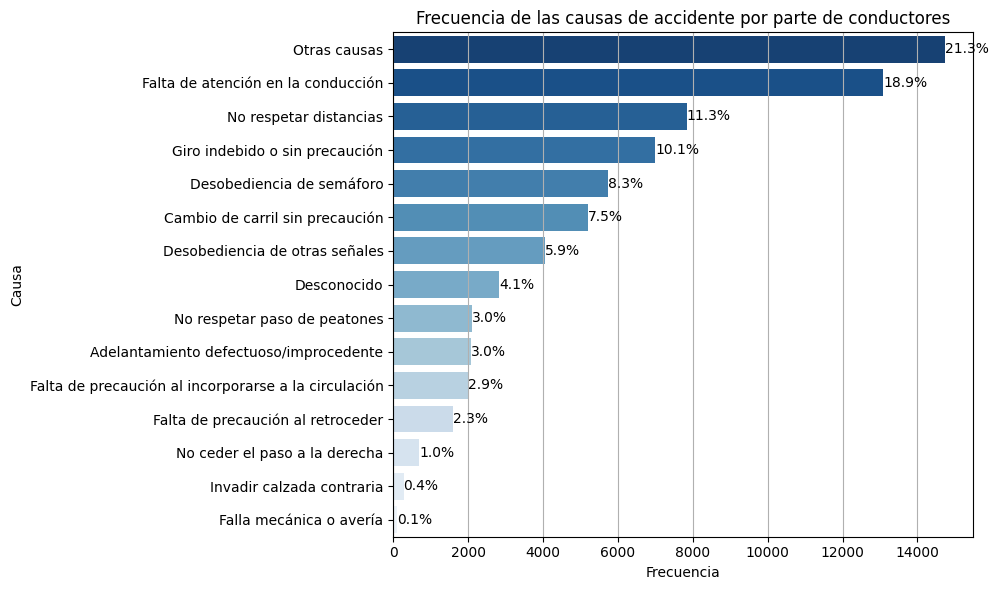

In [12]:
plotHorizontalBarplot(df, 'Causa_conductor', 'Frecuencia de las causas de accidente por parte de conductores', 'Frecuencia', 'Causa')

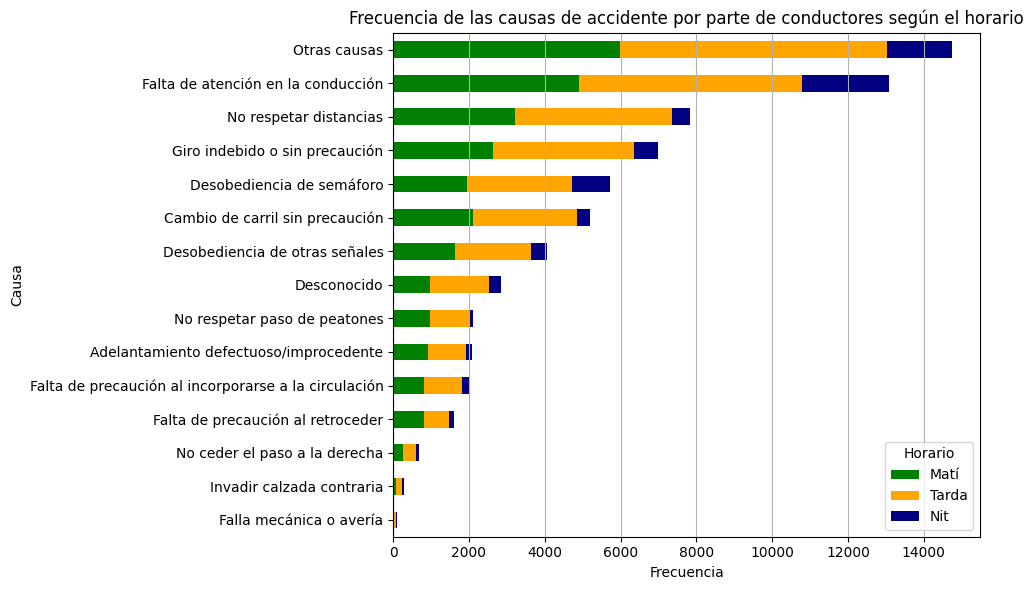

In [13]:
plotHorizontalBarplotByHorario(df, 'Causa_conductor', 'Horario', 'Frecuencia de las causas de accidente por parte de conductores según el horario', 'Frecuencia', 'Causa')

In [14]:
df.Causa_conductor.value_counts()

Causa_conductor
Otras causas                                            14747
Falta de atención en la conducción                      13085
No respetar distancias                                   7842
Giro indebido o sin precaución                           6997
Desobediencia de semáforo                                5731
Cambio de carril sin precaución                          5206
Desobediencia de otras señales                           4064
Desconocido                                              2835
No respetar paso de peatones                             2110
Adelantamiento defectuoso/improcedente                   2081
Falta de precaución al incorporarse a la circulación     1990
Falta de precaución al retroceder                        1606
No ceder el paso a la derecha                             691
Invadir calzada contraria                                 277
Falla mecánica o avería                                    93
Name: count, dtype: int64

In [15]:
pd.Series()

Series([], dtype: object)

#*Causas de siniestralidad más frecuentes por parte del conductor*

<ipython-input-16-5dd80d600342>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=series.values, y=series.index, palette=paleta)


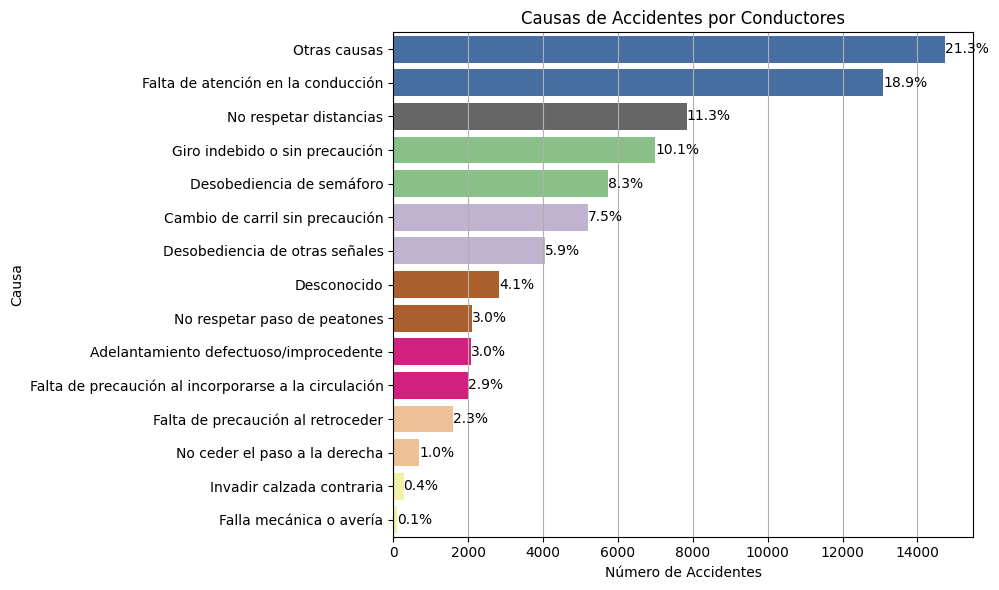

In [16]:
# Obtener los conteos de 'Causa_conductor'
causa_conductor_counts = df['Causa_conductor'].value_counts()

# Definir la función para el gráfico
def plotHorizontalBarplot_v5(series, title, xlabel, ylabel, palette='Accent'):
    plt.figure(figsize=(10, 6))

    total = series.sum()  # Calcula el total de accidentes

    # Define color palette
    paleta = sns.color_palette(palette, len(series))
    paleta.sort(reverse=False)

    # Intercambiar x y y para hacer un gráfico de barras horizontales
    ax = sns.barplot(x=series.values, y=series.index, palette=paleta)

    for p in ax.patches:
        porcentaje = '{:.1f}%'.format(100 * p.get_width() / total)  # Calcula el porcentaje
        x = p.get_width()  # Posición x del texto
        y = p.get_y() + p.get_height() / 2  # Posición y del texto
        ax.annotate(porcentaje, (x, y), ha='left', va='center', fontsize=10)  # Anotación del porcentaje

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='x')  # Mostrar líneas de la cuadrícula solo en el eje x
    plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
    plt.show()

plotHorizontalBarplot_v5(causa_conductor_counts,
                         title='Causas de Accidentes por Conductores',
                         xlabel='Número de Accidentes',
                         ylabel='Causa')

<ipython-input-18-b387299ffff3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=series.values, y=series.index, palette=paleta)


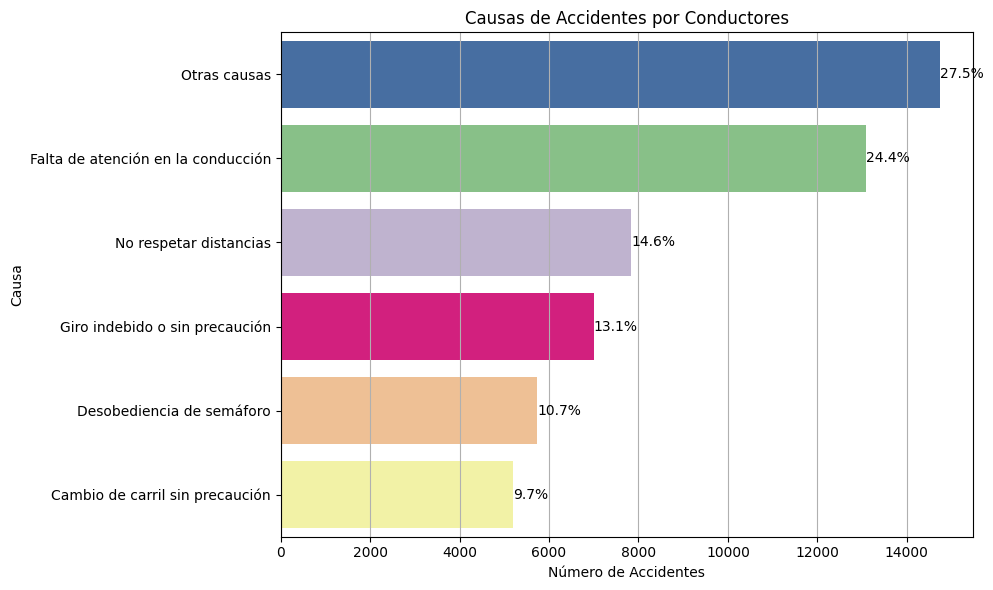

In [18]:
#vamos a limitarlo al TOP 6
def plotHorizontalBarplot_v5(series, title, xlabel, ylabel, palette='Accent'):
    plt.figure(figsize=(10, 6))

    total = series.sum()  # Calcula el total de accidentes

    # Define color palette
    paleta = sns.color_palette(palette, len(series))
    paleta.sort(reverse=False)

    # Intercambiar x y y para hacer un gráfico de barras horizontales
    ax = sns.barplot(x=series.values, y=series.index, palette=paleta)

    color_mapping = {label: color for label, color in zip(series.index, paleta)}

    for p in ax.patches:
        porcentaje = '{:.1f}%'.format(100 * p.get_width() / total)  # Calcula el porcentaje
        x = p.get_width()  # Posición x del texto
        y = p.get_y() + p.get_height() / 2  # Posición y del texto
        ax.annotate(porcentaje, (x, y), ha='left', va='center', fontsize=10)  # Anotación del porcentaje

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='x')  # Mostrar líneas de la cuadrícula solo en el eje x
    plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
    plt.show()

    return color_mapping

causa_conductor_counts = df['Causa_conductor'].value_counts().head(6)
color_mapping = plotHorizontalBarplot_v5(causa_conductor_counts,
                                         title='Causas de Accidentes por Conductores',
                                         xlabel='Número de Accidentes',
                                         ylabel='Causa')




####*Evolución Temporal*

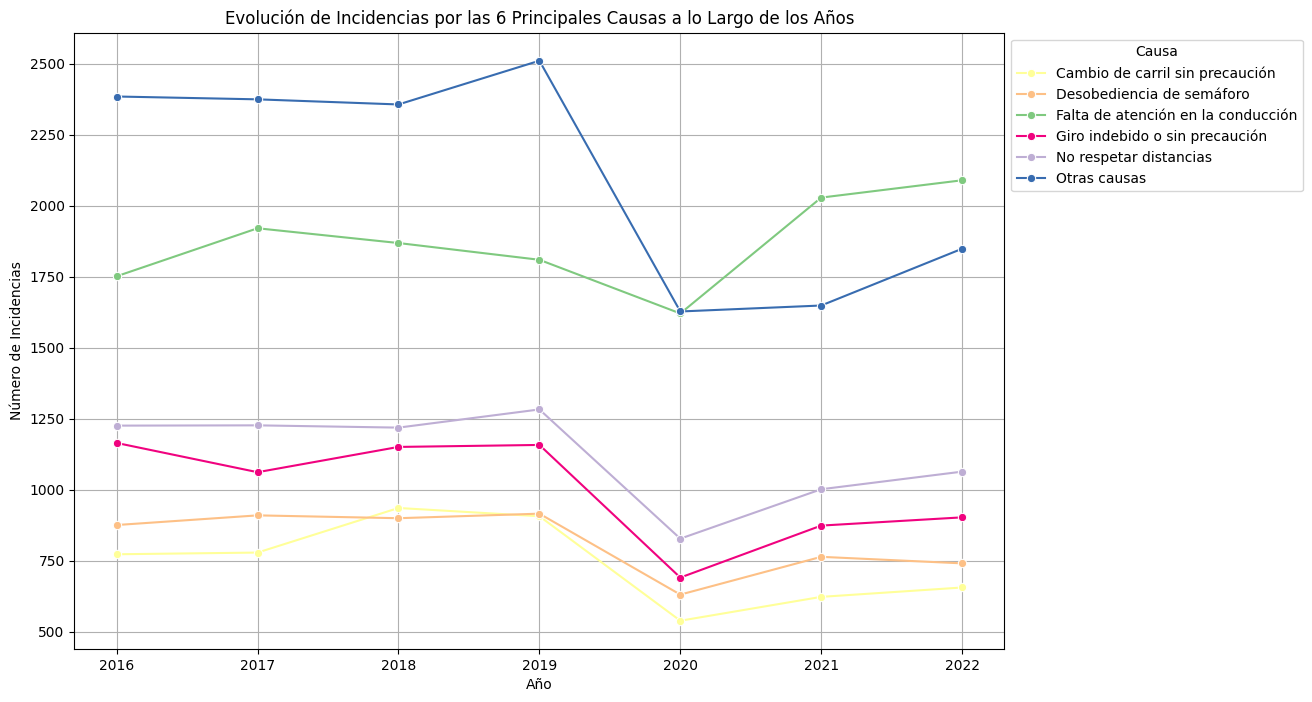

In [19]:
def plot_time_series_top_causas(df, color_mapping, top_n=6):
    df = df.dropna(subset=['Any', 'Causa_conductor'])

    # Calcular el total de incidencias por cada causa
    top_causas = df['Causa_conductor'].value_counts().nlargest(top_n).index

    # Filtrar el DataFrame para incluir solo las causas principales
    df_top_causas = df[df['Causa_conductor'].isin(top_causas)]

    # Agrupar por año y causa
    df_agrupado = df_top_causas.groupby(['Any', 'Causa_conductor']).size().reset_index(name='Incidencias')

    # Crear el gráfico de líneas
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=df_agrupado, x='Any', y='Incidencias', hue='Causa_conductor', palette=color_mapping, marker='o')

    # Configurar el gráfico
    plt.title('Evolución de Incidencias por las 6 Principales Causas a lo Largo de los Años')
    plt.xlabel('Año')
    plt.ylabel('Número de Incidencias')
    plt.legend(title='Causa', loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()



# Filtrar el color_mapping para las 6 principales causas
top_causas = causa_conductor_counts.head(6).index
filtered_color_mapping = {k: color_mapping[k] for k in top_causas}

# Llama a la función con tu DataFrame y el mapeo de colores
plot_time_series_top_causas(df, filtered_color_mapping)


####*Evolución por localización*

<ipython-input-22-864d3ed31c60>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_por_distrito.values, y=total_por_distrito.index, palette=paleta)


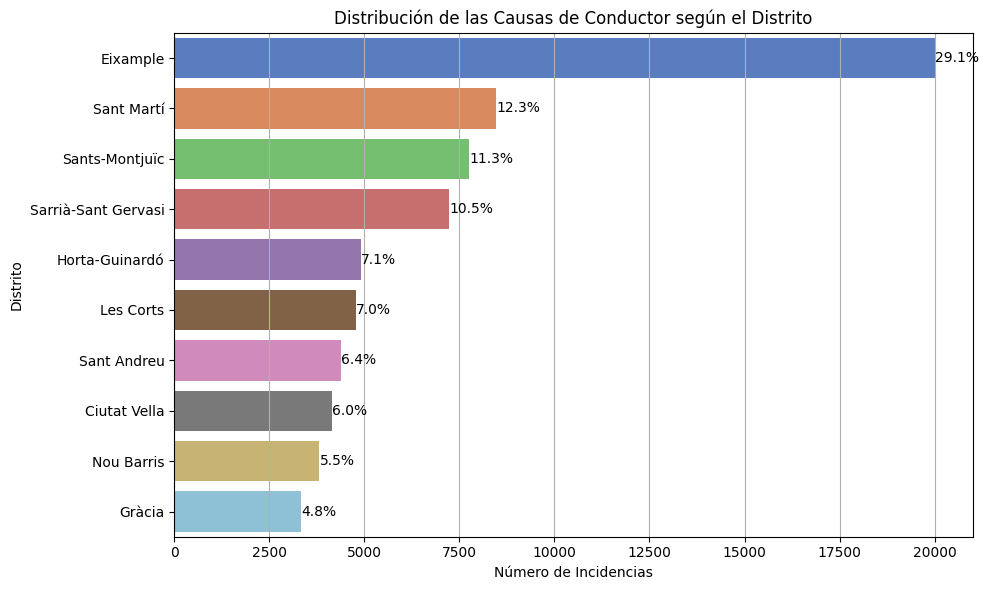

In [22]:
def plotHorizontalBarplot_causas_distrito(df, title, xlabel, ylabel, palette="muted"):
    plt.figure(figsize=(10, 6))
    conteo = df.groupby(['Nom_districte', 'Causa_conductor']).size().unstack(fill_value=0)

    district_order = ['Eixample', 'Sant Martí', 'Sants-Montjuïc', 'Sarrià-Sant Gervasi', 'Horta-Guinardó',
                      'Les Corts', 'Sant Andreu', 'Ciutat Vella', 'Nou Barris', 'Gràcia']

    conteo = conteo.reindex(district_order)

    # Sumar las incidencias por distrito
    total_por_distrito = conteo.sum(axis=1)

    # Obtener la paleta de colores
    paleta = sns.color_palette(palette, len(total_por_distrito))

    # Crear el gráfico de barras horizontales
    ax = sns.barplot(x=total_por_distrito.values, y=total_por_distrito.index, palette=paleta)

    # Calcular el total de incidencias
    total = total_por_distrito.sum()

    # Anotar el porcentaje de incidencias en cada barra
    for p in ax.patches:
        porcentaje = '{:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.annotate(porcentaje, (x, y), ha='left', va='center', fontsize=10)

    # Configurar el título y los ejes
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

plotHorizontalBarplot_causas_distrito(df,
                                      title='Distribución de las Causas de Conductor según el Distrito',
                                      xlabel='Número de Incidencias',
                                      ylabel='Distrito')

In [27]:
df[df['Nom_districte']=='Eixample']['Causa_conductor'].count()

20006